In [181]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [182]:
df = pd.read_csv('smartphones - smartphones.csv')

In [183]:
df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [184]:
df.shape

(1020, 11)

In [185]:
df.columns

Index(['model', 'price', 'rating', 'sim', 'processor', 'ram', 'battery',
       'display', 'camera', 'card', 'os'],
      dtype='object')

## Data Assessing

### Quality Issues

1. **model** - some brands are written diiferently like OPPO in model column `consistency`
2. **price** - has unneccesary '₹' `validity`
3. **price** - has ',' between numbers `validity`
4. **price** - phone Namotel has a price of 99 `accuracy`
5. **ratings** - missing values `completeness`
6. **processor** - has some incorrect values for some samsung phones(row # -642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002) `validity`
7. There is ipod on row 756 `validity`
8. **memory** - incorrect values in rows (441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002) `validity`
9. **battery** - incorrect values in rows(113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002) `validity`
10. **display** - sometimes frequency is not available `completeness`
11. **display** - incorrect values in rows(378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002) `validity`
12. certain phones are foldable and the info is scattered `validity`
13. **camera** - words like Dual, Triple and Quad are used to represent number of cameras and front and rear cameras are separated by '&'
14. **camera** - problem with rows (100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016
) `validity`
15. **card** - sometimes contains info about os and camera `validity`
16. **os** - sometimes contains info about bluetooth and fm radio `validity`
17. **os** - issue with rows (324,378) `validity`
18. **os** - sometimes contains os version name like lollipop `consistency`
19. missing values in camera, card and os `completeness`
20. datatype  of price and rating is incorrect `validity`



### Tidiness Issues

1. **sim** - can be split into 3 cols has_5g, has_NFC, has_IR_Blaster
2. **ram** - can be split into 2 cols RAM and ROM
3. **processor** - can be split into processor name, cores and cpu speed.
4. **battery** - can be split into battery capacity, fast_charging_available
5. **display** - can be split into size, resolution_width, resolution_height and frequency
6. **camera** - can be split into front and rear camera
7. **card** - can be split into supported, extended_upto

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [187]:
df.describe()

,rating
count,879.000000
mean,78.258248
std,7.402854
min,60.000000
25%,74.000000
50%,80.000000
75%,84.000000
max,89.000000


In [188]:
# make a copy
df1 = df.copy()

In [189]:
df1.head(2)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12


In [190]:
df1['price'] = df1['price'].str.replace('₹', '').str.replace(',', '').astype(int)

In [191]:
df1.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


##### as we observe manully there are some data problem in rows so below we make our df rows and execel file rows same so make the operations correct

In [192]:
df1 = df1.reset_index()

In [193]:
df1['index'] = df1['index'] + 2

In [194]:
df1

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13
5,7,Samsung Galaxy F23 5G (6GB RAM + 128GB),16999,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 750G, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.6 inches, 1080 x 2408 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 8 MP Front C...,"Memory Card Supported, upto 1 TB",Android v12
6,8,Apple iPhone 14,65999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor","6 GB RAM, 128 GB inbuilt",3279 mAh Battery with Fast Charging,"6.1 inches, 1170 x 2532 px Display with Small ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v16
7,9,Xiaomi Redmi Note 12 Pro Plus,29999,86.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Dimensity 1080, Octa Core, 2.6 GHz Processor","8 GB RAM, 256 GB inbuilt",4980 mAh Battery with 120W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v12
8,10,Nothing Phone 1,26749,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G Plus, Octa Core, 2.5 GHz Proce...","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 33W Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 16 MP Front Camera,Android v12,No FM Radio
9,11,OnePlus Nord 2T 5G,28999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 1300, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 80W Fast Charging,"6.43 inches, 1080 x 2400 px, 90 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,Android v12,No FM Radio


In [195]:
processor_rows = set((642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002))
ram_rows = set((441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002))
battery_rows = set((113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002))
display_rows = set((378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002))
camera_rows = set((100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016 ))

In [196]:
df1[df1['index'].isin(processor_rows | ram_rows | battery_rows | display_rows | camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
155,157,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
271,273,Nokia 2720 V Flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,2 MP Rear Camera,Memory Card Supported
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12


In [197]:
df1[df1['index'].isin(processor_rows & ram_rows & battery_rows & display_rows & camera_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
640,642,Nokia 105 Plus,1299,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",800 mAh Battery,"1.77 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
647,649,Motorola Moto A10,1339,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",1750 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",NaN,NaN
657,659,Zanco Tiny T1,2799,NaN,Single Sim,"32 MB RAM, 32 MB inbuilt",200 mAh Battery,"0.49 inches, 64 x 32 px Display",No Rear Camera,No FM Radio,Bluetooth,NaN
665,667,itel it2163S,958,NaN,Dual Sim,"4 MB RAM, 4 MB inbuilt",1200 mAh Battery,"1.8 inches, 160 x 128 px Display",No Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,NaN
748,750,Nokia 400 4G,3290,NaN,"Dual Sim, 4G, VoLTE, Wi-Fi",2000 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear & 0.3 MP Front Camera,"Memory Card Supported, upto 64 GB",Bluetooth,Browser,NaN
757,759,Karbonn KU3i,995,NaN,Dual Sim,"52 MB RAM, 32 MB inbuilt",1000 mAh Battery,"1.8 inches, 128 x 160 px Display",No Rear Camera,"Memory Card Supported, upto 16 GB",Bluetooth,NaN
817,819,itel Magic X,2239,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",No 3G,T117,"48 MB RAM, 128 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",1.3 MP Rear Camera,"Memory Card Supported, upto 64 GB"
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


In [198]:
df1 = df1[df1['price'] >= 3400]

In [199]:
df1.head()

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [200]:
df1[df1['rating'].isnull()]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
14,16,Samsung Galaxy S23 Ultra 5G,114990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3088 px, 120 Hz Display wit...",200 MP Quad Rear & 12 MP Front Camera,Memory Card Not Supported,Android v13
29,31,OnePlus 11 Pro,69999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4500 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Android v13,No FM Radio
37,39,Samsung Galaxy S22 Ultra 5G,91999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.8 inches, 1440 x 3080 px, 120 Hz Display wit...",108 MP Quad Rear & 40 MP Front Camera,Android v12,Bluetooth
49,51,Samsung Galaxy A74 5G,42999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 7 Gen1, Octa Core, 2.36 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP Quad Rear & 32 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v12
69,71,Oppo Find N Fold,99990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front...,Android v12
75,77,Gionee G13 Pro,6190,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Tiger T310, Quad Core, 2 GHz Processor","4 GB RAM, 32 GB inbuilt",3500 mAh Battery,"6.26 inches, 720 x 1600 px Display with Large ...",13 MP Dual Rear & 5 MP Front Camera,Memory Card Supported,HarmonyOS v2
89,91,Samsung Galaxy A73 5G,41999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 778G, Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 25W Fast Charging,"6.7 inches, 1080 x 2400 px, 120 Hz Display wit...",108 MP Quad Rear & 32 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v12
93,95,Vivo X90 Pro Plus 5G,73999,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4700 mAh Battery with 80W Fast Charging,"6.78 inches, 1440 x 3200 px, 120 Hz Display wi...",50.3 MP Quad Rear & 32 MP Front Camera,Android v13,No FM Radio
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
105,107,Xiaomi 13 Pro 5G,58990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","8 GB RAM, 128 GB inbuilt",4820 mAh Battery with 120W Fast Charging,"6.73 inches, 1440 x 3200 px, 120 Hz Display wi...",50.3 MP + 50 MP + 50 MP Triple Rear & 32 MP Fr...,Memory Card Not Supported,Android v13


In [201]:
df1[df1['index'].isin(processor_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
645,647,Nokia 2760 Flip,5490,NaN,"Dual Sim, 3G, 4G, Wi-Fi",1450 mAh Battery,"3.6 inches, 240 x 320 px Display",5 MP Rear & 5 MP Front Camera,"Memory Card Supported, upto 32 GB",Kaios v3.0,Bluetooth,NaN
857,859,LG Folder 2,11999,NaN,"Single Sim, 3G, 4G, Wi-Fi","1 GB RAM, 8 GB inbuilt",1470 mAh Battery,"2.8 inches, 240 x 320 px Display",2 MP Rear Camera,Memory Card Supported,Bluetooth,NaN
882,884,Nokia 5710 XpressAudio,4799,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.4 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"
925,927,Nokia 3310 4G,3999,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","256 MB RAM, 512 MB inbuilt",1200 mAh Battery,"2.4 inches, 240 x 320 px Display",2 MP Rear Camera,"Memory Card Supported, upto 32 GB",Bluetooth,Browser


In [202]:
df1.drop([645,857,882,925],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\1676279141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([645,857,882,925],inplace=True)


In [203]:
df1[df1['index'].isin(ram_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
483,485,Huawei Mate 50 RS Porsche Design,239999,81.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",512 GB inbuilt,4700 mAh Battery with 66W Fast Charging,"6.74 inches, 1212 x 2616 px, 120 Hz Display",50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...,"Memory Card (Hybrid), upto 256 GB",Hongmeng OS v3.0
582,584,Nokia 8210 4G,3749,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",0.3 MP Rear Camera,"Memory Card Supported, upto 32 GB"


In [204]:
df1.drop(582,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\544825702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(582,inplace=True)


In [205]:
df1[df1['index'].isin(battery_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
363,365,Apple iPhone 12 Mini (128GB),45999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt","5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14,No FM Radio
376,378,Nokia 2660 Flip,4649,NaN,"Dual Sim, 3G, 4G",No Wifi,Unisoc T107,"48 MB RAM, 128 MB inbuilt",1450 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,0.3 MP Rear Camera
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15,No FM Radio
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt","6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15,No FM Radio
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt","6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0,No FM Radio
754,756,Apple iPod Touch (7th Gen),18900,NaN,Wi-Fi,32 GB inbuilt,"4 inches, 640 x 1136 px Display",8 MP Rear & 1.2 MP Front Camera,iOS v12,No FM Radio,Bluetooth,Browser
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16,No FM Radio


In [206]:
df1.drop([376,754],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\2579486625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([376,754],inplace=True)


In [207]:
temp_df = df1[df1['index'].isin(battery_rows)]

In [208]:
x = temp_df.iloc[:,7:].shift(1,axis=1).values

In [209]:
df1.loc[temp_df.index,temp_df.columns[7:]] = x

In [210]:
df1[df1['index'].isin(display_rows)]

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
439,441,Apple iPhone SE 3 2022,43900,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"4.7 inches, 750 x 1334 px Display",12 MP Rear & 7 MP Front Camera,Memory Card Not Supported,iOS v15
448,450,Apple iPhone 15 Pro,130990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",Bionic A16,"8 GB RAM, 128 GB inbuilt",None,"6.06 inches, 1170 x 2532 px, 120 Hz Display wi...",50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v15
628,630,Apple iPhone 12 Pro (512GB),139900,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","6 GB RAM, 512 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...,Memory Card Not Supported,iOS v14.0
762,764,Apple iPhone SE 4,49990,60.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A15, Hexa Core, 3.22 GHz Processor",64 GB inbuilt,None,"6.1 inches, 750 x 1580 px Display",12 MP Rear & 10.8 MP Front Camera,Memory Card Not Supported,iOS v16
913,915,Apple iPhone 12 Mini (256GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
914,916,Apple iPhone 12 (256GB),67999,76.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 256 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14


In [211]:
len(display_rows)

27

In [212]:
len(camera_rows)

64

In [213]:
df1[df1['index'].isin(camera_rows)]
# 155 271

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
98,100,Vivo X Fold 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","12 GB RAM, 256 GB inbuilt",4600 mAh Battery with 66W Fast Charging,"8.03 inches, 1916 x 2160 px, 120 Hz Display",Foldable Display,50 MP Quad Rear & 16 MP Front Camera,Android v12
111,113,Apple iPhone 12,51999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
149,151,Apple iPhone 12 Mini,40999,74.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 64 GB inbuilt",None,"5.4 inches, 1080 x 2340 px Display",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
155,157,Nokia 2780 Flip,4990,NaN,"Dual Sim, 3G, 4G, Wi-Fi","Snapdragon QM215, Quad Core, 1.3 GHz Processor","4 GB RAM, 512 MB inbuilt",1450 mAh Battery,"2.7 inches, 240 x 320 px Display",Dual Display,5 MP Rear Camera,"Memory Card Supported, upto 32 GB"
159,161,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,Memory Card Not Supported
236,238,Xiaomi Mix Fold 2 5G,106990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8+ Gen1 , Octa Core, 3.2 GHz Proce...","12 GB RAM, 256 GB inbuilt",4500 mAh Battery with 67W Fast Charging,"8.02 inches, 1914 x 2160 px, 120 Hz Display wi...","Foldable Display, Dual Display",50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front...,Android v12
271,273,Nokia 2720 V Flip,6199,NaN,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Snapdragon 205 , Dual Core, 1.1 GHz Processor","512 MB RAM, 4 GB inbuilt",1500 mAh Battery,"2.8 inches, 240 x 320 px Display",Dual Display,2 MP Rear Camera,Memory Card Supported
306,308,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 888, Octa Core, 2.84 GHz Processor","8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...","Foldable Display, Dual Display",12 MP + 12 MP Dual Rear & 10 MP Front Camera,Memory Card Not Supported
307,309,Apple iPhone 12 (128GB),55999,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Bionic A14, Hexa Core, 3.1 GHz Processor","4 GB RAM, 128 GB inbuilt",None,"6.1 inches, 1170 x 2532 px Display with Large ...",12 MP + 12 MP Dual Rear & 12 MP Front Camera,Memory Card Not Supported,iOS v14
321,323,Samsung Galaxy Z Fold 4,154998,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",4400 mAh Battery with 25W Fast Charging,"7.6 inches, 1812 x 2176 px, 120 Hz Display wit...","Foldable Display, Dual Display",50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 ...,Android v12


In [214]:
df1.drop([155, 271],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\1013040976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([155, 271],inplace=True)


In [215]:
temp_df = df1[df1['index'].isin(camera_rows)]

In [216]:
temp_df = temp_df[~temp_df['camera'].str.contains('MP')]

In [217]:
df1.loc[temp_df.index, 'camera'] = temp_df['card'].values

In [218]:
df1['card'].value_counts()

card
Memory Card Supported, upto 1 TB                                       171
Memory Card Not Supported                                              123
Android v12                                                            107
Memory Card Supported, upto 512 GB                                     105
Memory Card (Hybrid), upto 1 TB                                         91
Memory Card Supported                                                   89
Memory Card Supported, upto 256 GB                                      87
Android v13                                                             46
Android v11                                                             41
Memory Card (Hybrid)                                                    30
Memory Card (Hybrid), upto 256 GB                                       13
Android v10                                                             11
Memory Card (Hybrid), upto 512 GB                                       11
Memory Card Supporte

In [219]:
temp_df = df1[df1['card'].str.contains('MP')]

In [220]:
df1.loc[temp_df.index,'card'] = 'Memory Card Not Supported'

In [221]:
df1['card'].value_counts()

card
Memory Card Supported, upto 1 TB       171
Memory Card Not Supported              149
Android v12                            107
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Android v13                             46
Android v11                             41
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Android v10                             11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 64 GB         3
Memory Card (Hybrid), upto 128 GB        3
Android v9.0 (Pie)                       2
Android v12.1                            1
Memory Card Supported, upto 1000 GB      1
iOS v10                                  1
Android v10.0                            1
iOS v1

In [222]:
pd.set_option('display.max_rows', None)

In [223]:
temp_df = df1[~df1['card'].str.contains('Memory Card')]

In [224]:
df1.loc[temp_df.index,'os'] = temp_df['card'].values

In [225]:
df1.loc[temp_df.index,'card'] = 'Memory Card Not Supported'

In [226]:
df1['card'].value_counts()

card
Memory Card Not Supported              362
Memory Card Supported, upto 1 TB       171
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 64 GB         3
Memory Card Supported, upto 1000 GB      1
Memory Card (Hybrid), upto 2 TB          1
Name: count, dtype: int64

In [227]:
df1['os'].value_counts()

os
Android v12                           394
Android v11                           274
Android v13                            91
Android v10                            69
Android v9.0 (Pie)                     29
Android v10.0                          23
iOS v16                                15
iOS v15                                12
Android v8.1 (Oreo)                    10
iOS v14                                 6
Memory Card Not Supported               6
Android v11.0                           4
Android v8.0 (Oreo)                     4
iOS v13                                 4
iOS v15.0                               3
Android v6.0 (Marshmallow)              2
Memory Card (Hybrid), upto 256 GB       2
Memory Card (Hybrid), upto 2 TB         2
HarmonyOS v2.0                          2
Android v5.1.1 (Lollipop)               2
Harmony v2.0                            2
EMUI v12                                2
Memory Card Supported, upto 256 GB      2
Android v12.1                  

In [228]:
temp_df = df1[df1['os'] == 'Bluetooth']

In [229]:
df1.loc[temp_df.index,'os'] = np.nan

In [230]:
df1.head()

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [231]:
df1['display'].value_counts()

display
6.67 inches, 1080 x 2400 px, 120 Hz Display with Punch Hole          54
6.5 inches, 720 x 1600 px Display with Water Drop Notch              36
6.7 inches, 1080 x 2412 px, 120 Hz Display with Punch Hole           25
6.52 inches, 720 x 1600 px Display with Water Drop Notch             23
6.5 inches, 1080 x 2400 px, 90 Hz Display with Punch Hole            22
6.51 inches, 720 x 1600 px Display with Water Drop Notch             21
6.43 inches, 1080 x 2400 px, 90 Hz Display with Punch Hole           19
6.43 inches, 1080 x 2400 px Display with Punch Hole                  16
6.62 inches, 1080 x 2400 px, 120 Hz Display with Punch Hole          15
6.53 inches, 720 x 1600 px Display with Water Drop Notch             14
6.4 inches, 1080 x 2400 px, 90 Hz Display with Punch Hole            14
6.55 inches, 1080 x 2400 px, 120 Hz Display with Punch Hole          11
6.7 inches, 1440 x 3216 px, 120 Hz Display with Punch Hole           10
6.58 inches, 1080 x 2408 px, 120 Hz Display with Water D

In [232]:
(982/1020)*100

96.27450980392157

In [233]:
df1.head()

,index,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,2,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [234]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      982 non-null    int64  
 1   model      982 non-null    object 
 2   price      982 non-null    int32  
 3   rating     879 non-null    float64
 4   sim        982 non-null    object 
 5   processor  982 non-null    object 
 6   ram        982 non-null    object 
 7   battery    971 non-null    object 
 8   display    982 non-null    object 
 9   camera     982 non-null    object 
 10  card       982 non-null    object 
 11  os         981 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 128.2+ KB


In [235]:
brand_names = df1['model'].str.split(' ').str.get(0)

In [236]:
df1.insert(1,'brand_name',brand_names)

In [237]:
df1['brand_name'] = df1['brand_name'].str.lower()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\3193801224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['brand_name'] = df1['brand_name'].str.lower()


In [238]:
has_5g = df1['sim'].str.contains('5G')
has_nfc = df1['sim'].str.contains('NFC')
has_ir_blaster = df1['sim'].str.contains('IR Blaster')

In [239]:
df1.insert(6,'has_5g',has_5g)
df1.insert(7,'has_nfc',has_nfc)
df1.insert(8,'has_ir_blaster',has_ir_blaster)

In [240]:
processor_name = df1['processor'].str.split(',').str.get(0)

In [241]:
num_cores = df1['processor'].str.split(',').str.get(1)

In [242]:
processor_speed = df1['processor'].str.split(',').str.get(2)

In [243]:
df1.insert(10,'processor_name',processor_name)
df1.insert(11,'num_cores',num_cores)
df1.insert(12,'processor_speed',processor_speed)

In [244]:
df1['processor_name'] = df1['processor_name'].str.strip()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\1632474951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['processor_name'] = df1['processor_name'].str.strip()


In [245]:
temp_df = df1[df1['processor_name'].str.contains('Core')][['processor_name', 'num_cores',	'processor_speed']].shift(1,axis=1)

In [246]:
temp_df.shape

(20, 3)

In [247]:
df1.loc[temp_df.index,['processor_name', 'num_cores',	'processor_speed']] = temp_df.values

In [248]:
df1.loc[856]

index                                                858
brand_name                                       samsung
model                            Samsung Galaxy A01 Core
price                                               4999
rating                                               NaN
sim                       Dual Sim, 3G, 4G, VoLTE, Wi-Fi
has_5g                                             False
has_nfc                                            False
has_ir_blaster                                     False
processor          (28 nm), Quad Core, 1.5 GHz Processor
processor_name                                   (28 nm)
num_cores                                      Quad Core
processor_speed                        1.5 GHz Processor
ram                              1 GB RAM, 16 GB inbuilt
battery                                 3000 mAh Battery
display                5.3 inches, 720 x 1480 px Display
camera                     8 MP Rear & 5 MP Front Camera
card                           

In [249]:
df1.loc[856,'processor_name'] = 'Mediatek MT6739'

In [250]:
processor_brand = df1['processor_name'].str.split(' ').str.get(0).str.lower()

In [251]:
df1.insert(11,'processor_brand',processor_brand)

In [252]:
df1['num_cores'] = df1['num_cores'].str.strip()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\2483753889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_cores'] = df1['num_cores'].str.strip()


In [253]:
df1['num_cores'] = df1['num_cores'].str.replace('Octa Core Processor','Octa Core').str.replace('Hexa Core Processor','Hexa Core')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\3285793486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['num_cores'] = df1['num_cores'].str.replace('Octa Core Processor','Octa Core').str.replace('Hexa Core Processor','Hexa Core')


In [254]:
df1['processor_speed'] = df1['processor_speed'].str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0).astype(float)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\825004774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['processor_speed'] = df1['processor_speed'].str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0).astype(float)


In [255]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [256]:
ram_capacity = df1['ram'].str.strip().str.split(',').str.get(0).str.findall(r'\b(\d+)\b').str.get(0)

In [257]:
df1.insert(16,'ram_capacity',ram_capacity)

In [258]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,ram_capacity,display,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,12,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,6,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,4,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,6,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,6,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [259]:
internal_memory = df1['ram'].str.strip().str.split(',').str.get(1).str.strip().str.findall(r'\b(\d+)\b').str.get(0)

In [260]:
df1.insert(17,'internal_memory',internal_memory)

In [261]:
df1['ram_capacity'] = df1['ram_capacity'].astype(float)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\2073605403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ram_capacity'] = df1['ram_capacity'].astype(float)


In [262]:
df1.drop([486,627],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\2098217776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop([486,627],inplace=True)


In [263]:
df1.loc[[483], ['ram_capacity','internal_memory']] = [12.0,'512']

In [264]:
df1['ram_capacity'].value_counts()

ram_capacity
8.0     339
6.0     234
4.0     215
12.0     86
3.0      54
2.0      32
16.0      9
1.0       7
18.0      2
64.0      2
Name: count, dtype: int64

In [265]:
df1['internal_memory'] = df1['internal_memory'].astype(float)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\3988935729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['internal_memory'] = df1['internal_memory'].astype(float)


In [266]:
temp_df = df1[df1['internal_memory'] == 1]

In [267]:
df1.loc[temp_df.index,'internal_memory'] = 1024

In [268]:
df1['internal_memory'].value_counts()

internal_memory
128.0     523
64.0      191
256.0     157
32.0       67
512.0      22
16.0       12
1024.0      5
8.0         1
Name: count, dtype: int64

In [269]:
battery_capacity = df1['battery'].str.strip().str.split('with').str.get(0).str.strip().str.findall(r'\b(\d+)\b').str.get(0).astype(float)

In [270]:
df1.insert(16,'battery_capacity',battery_capacity)

In [271]:
fast_charging = df1['battery'].str.strip().str.split('with').str.get(1).str.strip().str.findall(r'\d{2,3}')

In [272]:
df1.insert(17,'fast_charging',fast_charging)

In [273]:
def fast_charging_extractor(item):

  if type(item) == list:
    if len(item) == 1:
      return item[0]
    else:
      return 0
  else:
    return -1

In [274]:
df1['fast_charging'] = df1['fast_charging'].apply(fast_charging_extractor).astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\3894870647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fast_charging'] = df1['fast_charging'].apply(fast_charging_extractor).astype(int)


In [275]:
screen_size = df1['display'].str.strip().str.split(',').str.get(0).str.strip().str.split(' ').str.get(0).astype(float)

In [276]:
df1.insert(21,'screen_size',screen_size)

In [277]:
resolution = df1['display'].str.strip().str.split(',').str.get(1).str.strip().str.split('px').str.get(0)

In [278]:
df1.insert(22,'resolution',resolution)

In [279]:
refresh_rate = df1['display'].str.strip().str.split(',').str.get(2).str.strip().str.findall(r'\d{2,3}').str.get(0).apply(lambda x: 60 if pd.isna(x) else x).astype(int)

In [280]:
df1.insert(22,'refresh_rate',refresh_rate)

In [281]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,5000.0,100,12.0,256.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.70,120,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,120,1080 x 2412,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,5000.0,15,4.0,64.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.60,90,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,5000.0,0,6.0,128.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,120,1080 x 2400,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,5000.0,67,6.0,128.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.70,120,1080 x 2412,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [282]:
def camera_extractor(text):

  if 'Quad' in text:
    return '4'
  elif 'Triple' in text:
    return '3'
  elif 'Dual' in text:
    return '2'
  elif 'Missing' in text:
    return 'Missing'
  else:
    return '1'

In [283]:
num_rear_cameras = df1['camera'].str.strip().str.split('&').str.get(0).apply(camera_extractor)

In [284]:
df1.insert(25,'num_rear_cameras',num_rear_cameras)

In [285]:
num_front_cameras = df1['camera'].str.strip().str.split('&').str.get(1).str.strip().fillna('Missing').apply(camera_extractor)

In [286]:
df1.insert(26,'num_front_cameras',num_front_cameras)

In [287]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,5000.0,100,12.0,256.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.70,120,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,120,1080 x 2412,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,5000.0,15,4.0,64.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.60,90,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,5000.0,0,6.0,128.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,120,1080 x 2400,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,5000.0,67,6.0,128.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.70,120,1080 x 2412,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card Not Supported,Android v13


In [288]:
df1[df1['num_front_cameras'] == 'Missing']

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os
69,71,oppo,Oppo Find N Fold,99990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,snapdragon,Octa Core,3.20,"8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 67W Fast Charging,5000.0,67,8.0,256.0,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",7.10,120,1792 x 1920,"Foldable Display, Dual Display",2,Missing,Memory Card Not Supported,Android v12
462,464,xiaomi,Xiaomi Mi Mix Alpha,199990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 855+, Octa Core, 2.96 GHz Processor",Snapdragon 855+,snapdragon,Octa Core,2.96,"12 GB RAM, 512 GB inbuilt",4050 mAh Battery with 40W Fast Charging,4050.0,40,12.0,512.0,"7.92 inches, 2088 x 2250 px Display",7.92,60,2088 x 2250,108 MP + 20 MP + 12 MP Triple Rear Camera,3,Missing,Memory Card Not Supported,Android v10
993,995,huawei,Huawei Mate X,169000,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...",True,True,True,"Kirin 990, Octa Core, 2.86 GHz Processor",Kirin 990,kirin,Octa Core,2.86,"8 GB RAM, 512 GB inbuilt",4500 mAh Battery with 55W Fast Charging,4500.0,55,8.0,512.0,"8 inches, 2200 x 2480 px Display",8.00,60,2200 x 2480,48 MP Quad Rear Camera,4,Missing,Memory Card Not Supported,"Memory Card (Hybrid), upto 256 GB"
1012,1014,itel,itel A23s,4787,NaN,"Dual Sim, 3G, 4G, Wi-Fi",False,False,False,"Spreadtrum SC9832E, Quad Core, 1.4 GHz Processor",Spreadtrum SC9832E,spreadtrum,Quad Core,1.40,"2 GB RAM, 32 GB inbuilt",3020 mAh Battery,3020.0,-1,2.0,32.0,"5 inches, 854 x 480 px Display",5.00,60,854 x 480,2 MP Rear Camera,1,Missing,Memory Card Not Supported,Android v11


In [289]:
pd.set_option('display.max_columns',None)

In [290]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,5000.0,100,12.0,256.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.70,120,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,Memory Card Not Supported,Android v13
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,120,1080 x 2412,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,5000.0,15,4.0,64.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.60,90,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,"Memory Card Supported, upto 1 TB",Android v13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,5000.0,0,6.0,128.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,120,1080 x 2400,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,5000.0,67,6.0,128.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.70,120,1080 x 2412,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card Not Supported,Android v13


In [291]:
#df1[df1['camera'] == 'Foldable Display, Dual Display']
df1.loc[69,'camera'] == '50 MP'

False

In [292]:
temp_df = df1[df1['camera'] == 'Foldable Display, Dual Display']

In [293]:
df1.loc[temp_df.index, 'camera'] = '50 MP'

In [294]:
df1['primary_camera_rear'] = df1['camera'].str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\3974806889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['primary_camera_rear'] = df1['camera'].str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)


In [295]:
df1['primary_camera_front'] = df1['camera'].str.split('&').str.get(1).str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\1434923224.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['primary_camera_front'] = df1['camera'].str.split('&').str.get(1).str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)


In [296]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os,primary_camera_rear,primary_camera_front
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,5000.0,100,12.0,256.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.70,120,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,Memory Card Not Supported,Android v13,50,16
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,120,1080 x 2412,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12,64,16
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,5000.0,15,4.0,64.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.60,90,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,"Memory Card Supported, upto 1 TB",Android v13,50,13
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,5000.0,0,6.0,128.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,120,1080 x 2400,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12,50,16
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,5000.0,67,6.0,128.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.70,120,1080 x 2412,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card Not Supported,Android v13,108,16


In [297]:
df1[df1['card'] == 'Memory Card (Hybrid)']

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os,primary_camera_rear,primary_camera_front
25,27,samsung,Samsung Galaxy S20 FE 5G,31239,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 865, Octa Core, 2.84 GHz Processor",Snapdragon 865,snapdragon,Octa Core,2.84,"8 GB RAM, 128 GB inbuilt",4500 mAh Battery with Fast Charging,4500.0,0,8.0,128.0,"6.5 inches, 1080 x 2400 px, 120 Hz Display wit...",6.50,120,1080 x 2400,12 MP + 12 MP + 8 MP Triple Rear & 32 MP Front...,3,1,Memory Card (Hybrid),Android v10,12,32
80,82,motorola,Motorola Moto G72 4G,15999,83.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,"Helio G99, Octa Core, 2.2 GHz Processor",Helio G99,helio,Octa Core,2.20,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,120,1080 x 2400,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card (Hybrid),Android v12,108,16
147,149,samsung,Samsung Galaxy M34 5G,16999,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Exynos 1200, Octa Core, 2.4 GHz Processor",Exynos 1200,exynos,Octa Core,2.40,"6 GB RAM, 128 GB inbuilt",6000 mAh Battery with 25W Fast Charging,6000.0,25,6.0,128.0,"6.5 inches, 1080 x 2400 px, 120 Hz Display wit...",6.50,120,1080 x 2400,64 MP Quad Rear & 32 MP Front Camera,4,1,Memory Card (Hybrid),Android v12,64,32
151,153,motorola,Motorola Moto G52,11999,75.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,"Snapdragon 680, Octa Core, 2.4 GHz Processor",Snapdragon 680,snapdragon,Octa Core,2.40,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,4.0,64.0,"6.6 inches, 2460 x 1080 px, 90 Hz Display with...",6.60,90,2460 x 1080,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,Memory Card (Hybrid),Android v12,50,16
178,180,vivo,Vivo Y75 5G,21990,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 700 5G, Octa Core, 2.2 GHz Processor",Dimensity 700 5G,dimensity,Octa Core,2.20,"8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,5000.0,18,8.0,128.0,"6.58 inches, 1080 x 2408 px Display with Water...",6.58,60,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,Memory Card (Hybrid),Android v12,50,16
204,206,motorola,Motorola Moto G52 (6GB RAM + 128GB),12999,79.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC",False,True,False,"Snapdragon 680, Octa Core, 2.4 GHz Processor",Snapdragon 680,snapdragon,Octa Core,2.40,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.6 inches, 2460 x 1080 px, 90 Hz Display with...",6.60,90,2460 x 1080,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,Memory Card (Hybrid),Android v12,50,16
248,250,motorola,Motorola Moto G73,25999,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Dimensity 930, Octa Core, 2.2 GHz Processor",Dimensity 930,dimensity,Octa Core,2.20,"8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 30W Fast Charging,5000.0,30,8.0,256.0,"6.5 inches, 1080 x 2400 px, 120 Hz Display wit...",6.50,120,1080 x 2400,50 MP + 8 MP Dual Rear & 16 MP Front Camera,2,1,Memory Card (Hybrid),Android v13,50,16
254,256,xiaomi,Xiaomi Redmi Note 11 Pro 5G,17990,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster",True,False,True,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.20,"6 GB RAM, 64 GB inbuilt",5000 mAh Battery with 67W Fast Charging,5000.0,67,6.0,64.0,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",6.67,120,1080 x 2400,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card (Hybrid),Android v11,108,16
281,283,vivo,Vivo V23e 5G,21994,84.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 810 5G, Octa Core, 2.4 GHz P

In [298]:
df1.loc[temp_df.index, 'card'] = 'Not Specified'

In [299]:
df1['extended_memory'] = df1['card'].apply(lambda x:'0' if 'Not' in x else x.split('upto')).str.get(-1).str.strip().str.replace('Memory Card Supported','Not Specified')

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\1471866915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['extended_memory'] = df1['card'].apply(lambda x:'0' if 'Not' in x else x.split('upto')).str.get(-1).str.strip().str.replace('Memory Card Supported','Not Specified')


In [300]:
df1.head()

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os,primary_camera_rear,primary_camera_front,extended_memory
0,2,oneplus,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor",Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,"12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,5000.0,100,12.0,256.0,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",6.70,120,1440 x 3216,50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,3,1,Memory Card Not Supported,Android v13,50,16,0
1,3,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,5000.0,33,6.0,128.0,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",6.59,120,1080 x 2412,64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12,64,16,1 TB
2,4,samsung,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Exynos 1330, Octa Core, 2.4 GHz Processor",Exynos 1330,exynos,Octa Core,2.4,"4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,5000.0,15,4.0,64.0,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",6.60,90,1080 x 2408,50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,3,1,"Memory Card Supported, upto 1 TB",Android v13,50,13,1 TB
3,5,motorola,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 695, Octa Core, 2.2 GHz Processor",Snapdragon 695,snapdragon,Octa Core,2.2,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,5000.0,0,6.0,128.0,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",6.55,120,1080 x 2400,50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,3,1,"Memory Card (Hybrid), upto 1 TB",Android v12,50,16,1 TB
4,6,realme,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Dimensity 1080, Octa Core, 2.6 GHz Processor",Dimensity 1080,dimensity,Octa Core,2.6,"6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,5000.0,67,6.0,128.0,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",6.70,120,1080 x 2412,108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,3,1,Memory Card Not Supported,Android v13,108,16,0


In [301]:
df1[df1['os'].str.contains('Memory Card')]

,index,brand_name,model,price,rating,sim,has_5g,has_nfc,has_ir_blaster,processor,processor_name,processor_brand,num_cores,processor_speed,ram,battery,battery_capacity,fast_charging,ram_capacity,internal_memory,display,screen_size,refresh_rate,resolution,camera,num_rear_cameras,num_front_cameras,card,os,primary_camera_rear,primary_camera_front,extended_memory
159,161,oppo,Oppo Find N2 5G,94990,NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,snapdragon,Octa Core,3.20,"12 GB RAM, 256 GB inbuilt",4520 mAh Battery with 67W Fast Charging,4520.0,67,12.0,256.0,"7.1 inches, 1792 x 1920 px, 120 Hz Display wit...",7.10,120,1792 x 1920,50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32...,3,2,Memory Card Not Supported,Memory Card Not Supported,50,32,0
306,308,samsung,Samsung Galaxy Z Flip 3,69999,84.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 888, Octa Core, 2.84 GHz Processor",Snapdragon 888,snapdragon,Octa Core,2.84,"8 GB RAM, 128 GB inbuilt",3300 mAh Battery with 15W Fast Charging,3300.0,15,8.0,128.0,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",6.70,120,1080 x 2640,12 MP + 12 MP Dual Rear & 10 MP Front Camera,2,1,Memory Card Not Supported,Memory Card Not Supported,12,10,0
322,324,royole,Royole FlexPai 2,109999,87.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi",True,False,False,"Snapdragon 865, Octa Core, 2.84 GHz Processor",Snapdragon 865,snapdragon,Octa Core,2.84,"8 GB RAM, 128 GB inbuilt",4450 mAh Battery,4450.0,-1,8.0,128.0,"7.8 inches, 1440 x 1920 px Display",7.80,60,1440 x 1920,64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...,3,1,Memory Card Not Supported,"Memory Card Supported, upto 256 GB",64,32,0
365,367,oppo,OPPO Find N Flip,89990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Dimensity 9000, Octa Core, 3.05 GHz Processor",Dimensity 9000,dimensity,Octa Core,3.05,"8 GB RAM, 128 GB inbuilt",4300 mAh Battery with 44W Fast Charging,4300.0,44,8.0,128.0,"6.8 inches, 1200 x 2400 px, 120 Hz Display wit...",6.80,120,1200 x 2400,50 MP + 8 MP Dual Rear & 32 MP Front Camera,2,1,Memory Card Not Supported,Memory Card Not Supported,50,32,0
392,394,oppo,OPPO Find N2 Flip,70990,88.0,"Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor",Dimensity 9000 Plus,dimensity,Octa Core,3.20,"8 GB RAM, 256 GB inbuilt",4300 mAh Battery with 44W Fast Charging,4300.0,44,8.0,256.0,"6.8 inches, 1080 x 2520 px, 120 Hz Display wit...",6.80,120,1080 x 2520,50 MP + 8 MP Dual Rear & 32 MP Front Camera,2,1,Memory Card Not Supported,Memory Card Not Supported,50,32,0
504,506,samsung,Samsung Galaxy Z Flip 4 5G,89999,88.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor",Snapdragon 8+ Gen1,snapdragon,Octa Core,3.20,"8 GB RAM, 128 GB inbuilt",3700 mAh Battery with 25W Fast Charging,3700.0,25,8.0,128.0,"6.7 inches, 1080 x 2640 px, 120 Hz Display wit...",6.70,120,1080 x 2640,12 MP + 12 MP Dual Rear & 10 MP Front Camera,2,1,Memory Card Not Supported,Memory Card Not Supported,12,10,0
570,572,lg,LG Wing 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC",True,True,False,"Snapdragon 765G , Octa Core, 2.4 GHz Processor",Snapdragon 765G,snapdragon,Octa Core,2.40,"8 GB RAM, 128 GB inbuilt",4000 mAh Battery with Fast Charging,4000.0,0,8.0,128.0,"6.8 inches, 1080 x 2460 px Display",6.80,60,1080 x 2460,64 MP + 13 MP + 12 MP Triple Rear & 32 MP Fron...,3,1,Memory Card Not Supported,"Memory Card (Hybrid), upto 2 TB",64,32,0
613,615,oukitel,Oukitel WP21,22990,82.0,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi",False,False,False,"Helio G99, Octa Core, 2.2 GHz Processor",Helio G99,helio,Octa Core,2.20,"12 GB RAM, 256 GB inbuilt",9800 mAh Battery with 66W Fast Charging,9800.0,66,12.0,256.0,"6.78 inches, 1080 x 2400 px, 120 Hz Display",6.78,120,1080 x 2400,64 MP + 20 MP + 2 MP Triple Rear & Main Front ...,3,1,Memory Card Not Supported,Memory Card (Hybrid),64,

In [302]:
df1.loc[temp_df.index, 'os'] = 'Not Specified'

In [303]:
df1['os'].value_counts()

os
Android v12                           393
Android v11                           274
Android v13                            91
Android v10                            69
Android v9.0 (Pie)                     29
Android v10.0                          23
iOS v16                                15
iOS v15                                12
Android v8.1 (Oreo)                    10
Memory Card Not Supported               6
iOS v14                                 6
Android v8.0 (Oreo)                     4
Android v11.0                           4
iOS v13                                 4
iOS v15.0                               3
Android v6.0 (Marshmallow)              2
Memory Card (Hybrid), upto 256 GB       2
Memory Card (Hybrid), upto 2 TB         2
HarmonyOS v2.0                          2
Android v5.1.1 (Lollipop)               2
Harmony v2.0                            2
Memory Card Supported, upto 256 GB      2
EMUI v12                                2
Android v12.1                  

In [304]:
def os_extractor(text):

  if 'Android' in text:
    return 'android'
  elif 'iOS' in text:
    return 'ios'
  elif 'Not Specified':
    return text
  elif 'Harmony' in text or 'Hongmeng' in text or 'EMUI' in text:
    return 'other'

In [305]:
df1['os'] = df1['os'].apply(os_extractor)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16200\2877873123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['os'] = df1['os'].apply(os_extractor)


In [306]:
export_df = df1.drop(columns=['index','sim','processor','ram','battery','display','camera','card'])

In [307]:
export_df.to_csv('smartphone_cleaned_v2.csv',index=False)

In [308]:
df1 = pd.read_csv('smartphone_cleaned_v2.csv')
df1.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_name,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,Snapdragon 8 Gen2,snapdragon,Octa Core,3.2,5000.0,100,12.0,256.0,6.70,120,1440 x 3216,3,1,android,50.0,16,0
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,Snapdragon 695,snapdragon,Octa Core,2.2,5000.0,33,6.0,128.0,6.59,120,1080 x 2412,3,1,android,64.0,16,1 TB
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,Exynos 1330,exynos,Octa Core,2.4,5000.0,15,4.0,64.0,6.60,90,1080 x 2408,3,1,android,50.0,13,1 TB
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,Snapdragon 695,snapdragon,Octa Core,2.2,5000.0,0,6.0,128.0,6.55,120,1080 x 2400,3,1,android,50.0,16,1 TB
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,Dimensity 1080,dimensity,Octa Core,2.6,5000.0,67,6.0,128.0,6.70,120,1080 x 2412,3,1,android,108.0,16,0


In [347]:
df1.duplicated().sum()

0

In [312]:
df1.isnull().sum()

brand_name                0
model                     0
price                     0
rating                  101
has_5g                    0
has_nfc                   0
has_ir_blaster            0
processor_name           20
processor_brand          20
num_cores                 6
processor_speed          42
battery_capacity         11
fast_charging             0
ram_capacity              0
internal_memory           2
screen_size               0
refresh_rate              0
resolution                0
num_rear_cameras          0
num_front_cameras         0
os                        0
primary_camera_rear       0
primary_camera_front      4
extended_memory           0
dtype: int64

In [346]:
df1['rating'] = df1['rating'].fillna(df1['rating'].mean())

In [348]:
df1[['processor_name', 'processor_brand']] = df1[['processor_name', 'processor_brand']].fillna('Unknown')

<Axes: ylabel='Density'>

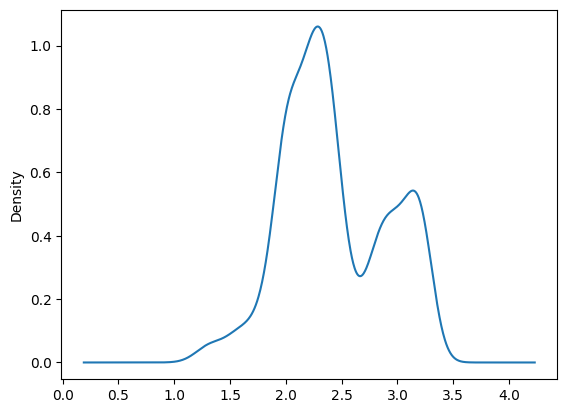

In [351]:
df1['processor_speed'].plot(kind='kde')

In [356]:
df1['processor_speed'] = df1['processor_speed'].fillna(df1['processor_speed'].mean())

In [363]:
df1['num_cores'] = df1['num_cores'].fillna(df1['num_cores'].mode()[0])

In [372]:
df1['battery_capacity'] = df1['battery_capacity'].fillna(df1['battery_capacity'].mode()[0])

In [380]:
df1['internal_memory'] = df1['internal_memory'].fillna(df1['internal_memory'].mode()[0])

In [387]:
df1['primary_camera_front'] = df1['primary_camera_front'].fillna(df1['primary_camera_front'].mode()[0])

Q1: What is the average price of smartphones by brand?

In [405]:
df1.groupby('brand_name')['price'].mean().sort_values(ascending=False).head(10)

brand_name
vertu     650000.000000
royole    129999.000000
leitz     124990.000000
apple      95966.521739
huawei     80177.250000
asus       74709.428571
tesla      69999.000000
lg         63329.333333
sony       60570.666667
sharp      59990.000000
Name: price, dtype: float64

<Axes: xlabel='brand_name', ylabel='price'>

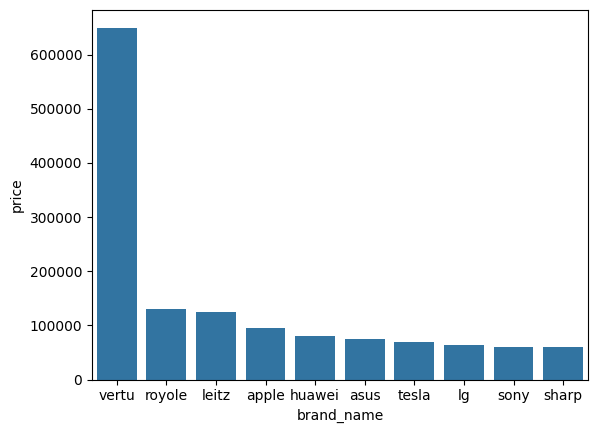

In [404]:
a = df1.groupby('brand_name')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(a)

Q2: top 10 average rating of the brands?

<Axes: ylabel='brand_name'>

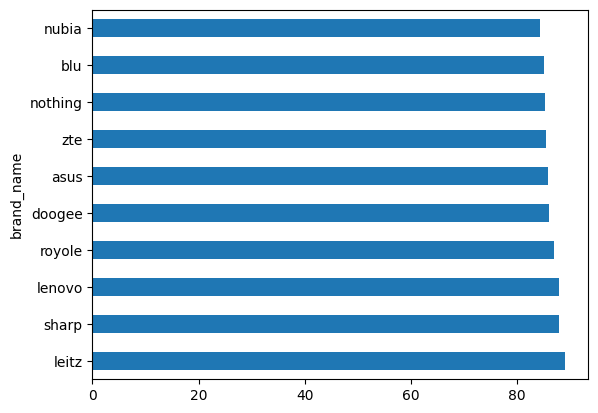

In [403]:
df1.groupby('brand_name')['rating'].mean().sort_values(ascending=False).head(10).plot(kind='barh')

Q3: What is the distribution of smartphone prices?

<Axes: xlabel='price', ylabel='Count'>

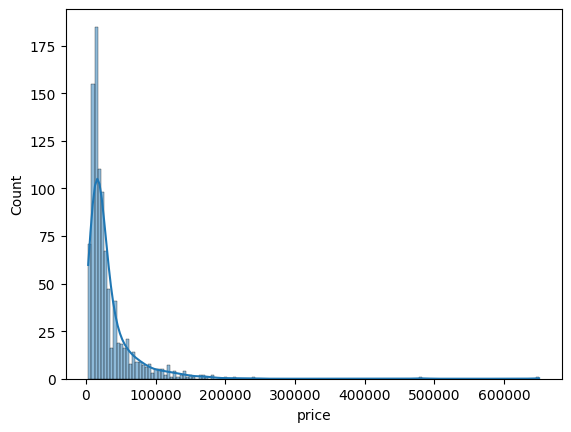

In [402]:
sns.histplot(df1['price'], kde=True)

Q4: How many models from each brand are available? 

In [401]:
df1.groupby('brand_name')['brand_name'].count().sort_values(ascending=False).head(10)

brand_name
xiaomi      134
samsung     132
vivo        111
realme       97
oppo         88
motorola     52
apple        46
oneplus      42
poco         41
tecno        33
Name: brand_name, dtype: int64

<Axes: xlabel='brand_name'>

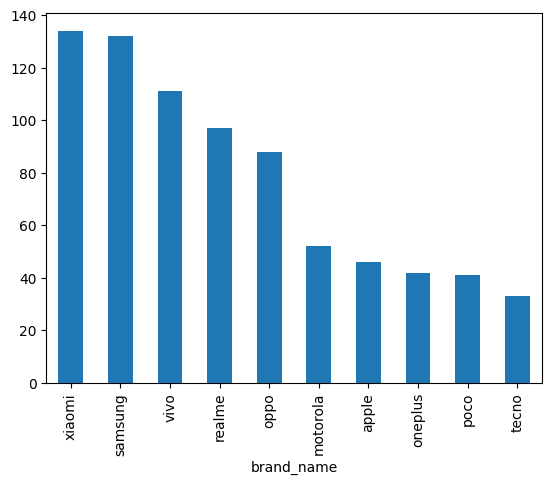

In [400]:
df1.groupby('brand_name')['brand_name'].count().sort_values(ascending=False).head(10).plot(kind='bar')

Q5: Which processor brands are most common?

In [399]:
df1.groupby('processor_brand')['processor_brand'].count().sort_values(ascending=False).head()

processor_brand
snapdragon    407
helio         201
dimensity     177
exynos         49
bionic         39
Name: processor_brand, dtype: int64

<Axes: ylabel='processor_brand'>

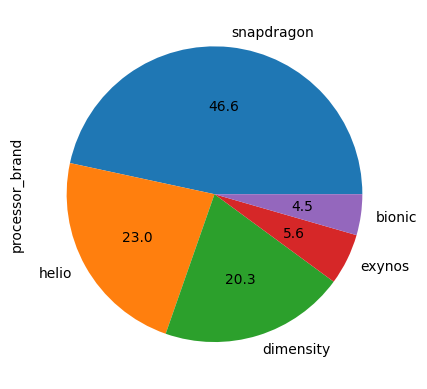

In [398]:
df1.groupby('processor_brand')['processor_brand'].count().sort_values(ascending=False).head().plot(kind='pie', autopct='%0.1f')

Q6: price of phones having 5g or not

In [397]:
df1.groupby('has_5g')['price'].sum()

has_5g
False     8153026
True     23717068
Name: price, dtype: int64

<Axes: xlabel='has_5g', ylabel='price'>

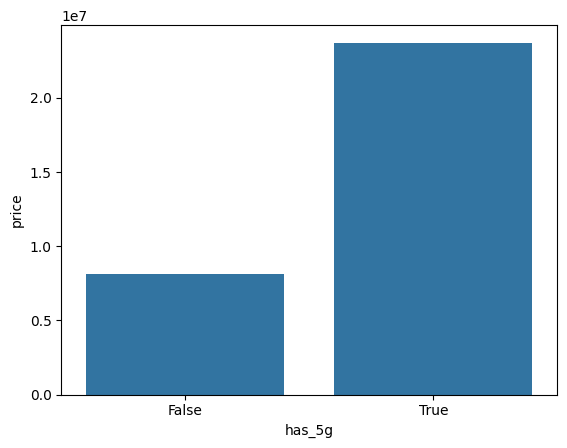

In [396]:
sns.barplot(df1.groupby('has_5g')['price'].sum())

Q7: Top 5 brands having higher number of phones with refresh rate > 90

In [395]:
df1[df1['refresh_rate']>90].groupby('brand_name')['brand_name'].count().sort_values(ascending=False).head()

brand_name
xiaomi     63
samsung    48
vivo       31
realme     31
iqoo       29
Name: brand_name, dtype: int64

<Axes: ylabel='brand_name'>

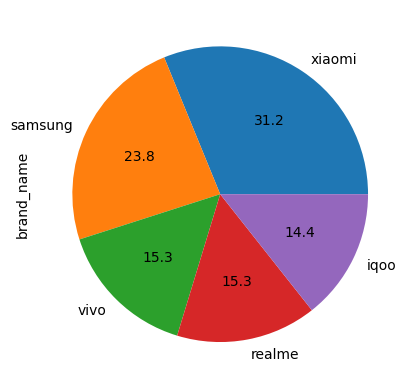

In [394]:
df1[df1['refresh_rate']>90].groupby('brand_name')['brand_name'].count().sort_values(ascending=False).head().plot(kind='pie', autopct='%0.1f')

Q8: Find the prices of phones having 5g and nfc

In [393]:
df1.groupby(['has_5g',	'has_nfc'])['price'].sum().reset_index()

,has_5g,has_nfc,price
0,False,False,4845664
1,False,True,3307362
2,True,False,5306379
3,True,True,18410689


As we can see that:

- if whether phone has either 5g or nfc or having both, those phones have higher prices

Q9: No of Samsung phones with processor types

In [392]:
df1[df1['brand_name']=='samsung'].groupby('processor_brand')['processor_brand'].count().sort_values(ascending=False)

processor_brand
exynos        49
snapdragon    36
helio         20
Unknown       11
dimensity     11
unisoc         3
mediatek       1
samsung        1
Name: processor_brand, dtype: int64

<Axes: ylabel='processor_brand'>

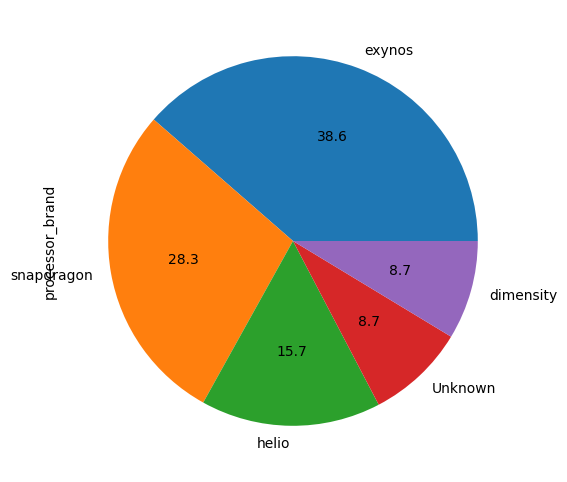

In [391]:
df1[df1['brand_name']=='samsung'].groupby('processor_brand')['processor_brand'].count().sort_values(ascending=False).head().plot(kind='pie', autopct='%0.1f', figsize=(6,6))

Q10: Top 5 brands, count number of phones having battery > 5000 

In [390]:
df1[df1['battery_capacity'] > 5000].groupby('brand_name')['brand_name'].count().sort_values(ascending=False).head()

brand_name
xiaomi     32
samsung    24
tecno      10
nokia       8
poco        8
Name: brand_name, dtype: int64

<Axes: ylabel='brand_name'>

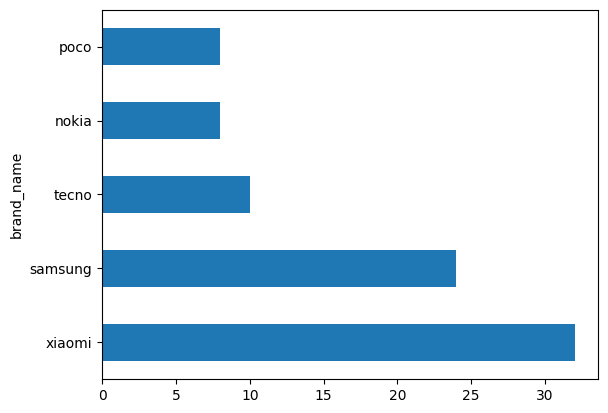

In [389]:
df1[df1['battery_capacity'] > 5000].groupby('brand_name')['brand_name'].count().sort_values(ascending=False).head().plot(kind='barh')